The Facial Expression Recognition dataset contains 35887 images, which has 1 numeric feature for image pixels and 1 categorical feature for facial expressions. Each image consists of a 48x48 pixel grayscale face that has been automatically registered to be centered and occupy about the same amount of space. Along with each image, there is a categorical number that represents the feeling of people inside the image (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral), which is also the prediction task for this lab.

Nowadays, there are many advertisements in the public, such as squares, bus stations, shopping malls, etc. Suppose there is a company who put up advertisements for their new product in various public places, and they want to know what are the citizens' reactions to these advertisements. So, they can adjust the content of their advertisement dynamically and increase the sales hopefully. They can install microcameras besides their advertisements board, and capture the facial emotions of the citizens after they watch the advertisements. The goal of our model is to distinguish different emotions precisely, then the company can know whether they should change the advertisement or not. If the proportion of bad emotions, such as angry, disgust, fear, exceeds a certain limit set up earlier, then the company need to adjust the content of that advertisement.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
import seaborn as sns
import numpy as np
import missingno as mn

In [33]:
# Import the dataset
df = pd.read_csv('/users/crazyworld/desktop/MLpython/lab2/fe/fer2013/fer2013.csv')
display(df.shape)
df.head(5)

(35887, 3)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


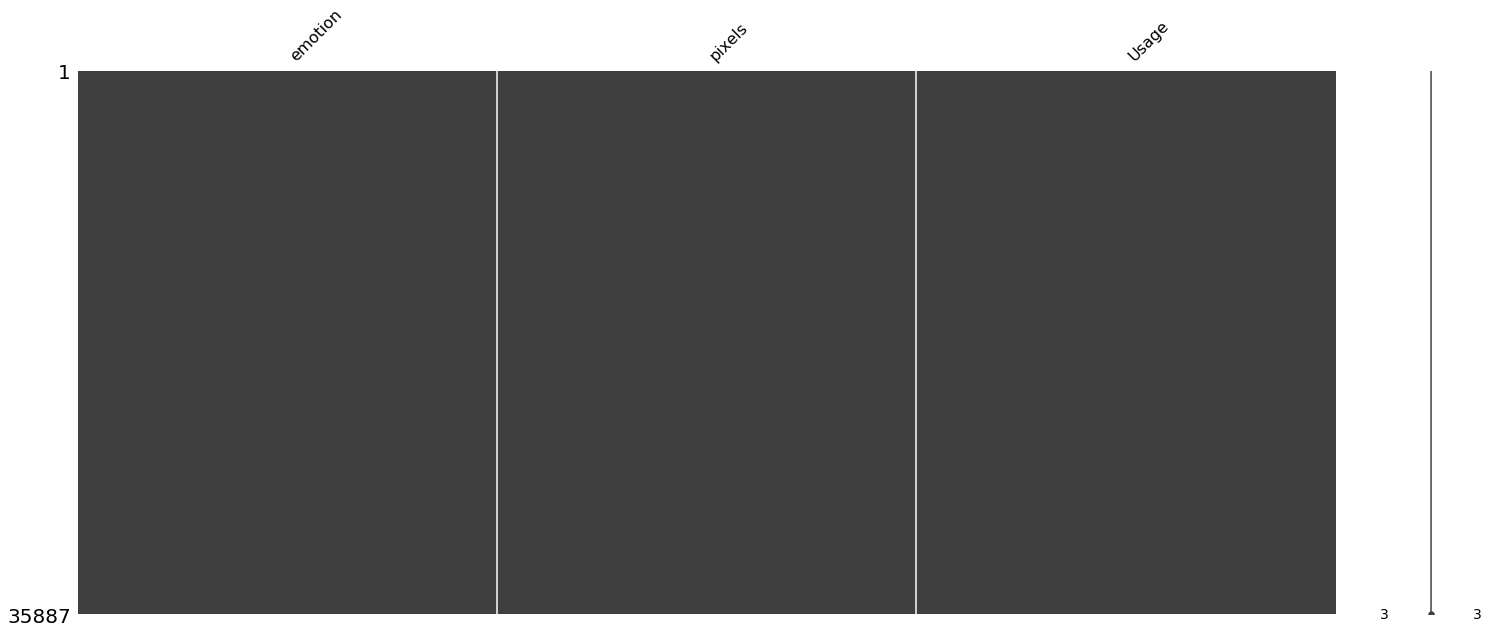

In [34]:
mn.matrix(df.sort_values(by=["pixels"]))

Based on the dataframe information and missingno matrix, there is no missing values or data for this dataset with 35887 instance and 3 features (35887 x 3).

In [36]:
# random select 1000 samples
df1 = df.sample(n=1000, random_state=1)
df1 = df1.reset_index(drop=True)

# convert the pixels column to numpy.array 
#df3 = df2.copy()
for i in range(len(df1.pixels)):
    df1.pixels[i] = np.array(list(map(int,df1.pixels[i].split(' '))))

df3.head(5)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,emotion,pixels,Usage
0,0,"[122, 107, 68, 76, 101, 125, 141, 144, 143, 15...",PrivateTest
1,3,"[151, 151, 165, 135, 131, 141, 185, 164, 140, ...",Training
2,3,"[88, 68, 83, 107, 84, 62, 91, 147, 159, 159, 1...",Training
3,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",PublicTest
4,3,"[231, 193, 124, 96, 115, 107, 84, 76, 84, 84, ...",Training


[4953  547 5121 8989 6077 4002 6198]


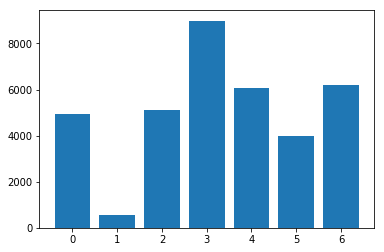

In [19]:
# check the distribution of each class
vals = np.bincount(df.emotion)
print(vals)
plt.bar(range(len(vals)),vals)
plt.show()

# Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. 

In this lab, we choose F1 score as our metric. First of all, from the above distribution of each class, we know that the dataset is not evenly distributed. So, accuracy score is not appropriate to our model. Our goal is to distinguish different facial expressions precisely for the company, then the company will make decisions on whether or not to adjust their advertisement based on our results. If we predict lots of good emotions to bad emotions, which will most likely make the company to change their advertisements. While, actually they do not need to change, so this will generate lots of unnecessary expense. And the new advertisement may turn out to be bad, this will cost more to change it again, and eventually this may decrease the sales. On the other hand, if we predict many bad emotions to good emotions, the company would think the advertisement is good and no change needed. Actually, the advertisement is bad, and this will mostly likely lead to a bad sales. In general, we want to make sure that both the false positive and false negative to be small, so we use F1 score.